In [27]:
from mode_energy_client.modoenergy_api_client import ModoEnergyAPIClient
import pandas as pd
import importlib

In [35]:
import mode_energy_client.modoenergy_api_client

importlib.reload(mode_energy_client.modoenergy_api_client)
from mode_energy_client.modoenergy_api_client import ModoEnergyAPIClient

client = ModoEnergyAPIClient(api_token="your_api_token_here")

In [20]:
df = client.get_paginated(
    "us/ercot/modo/owners",
    params={"date_from": "2010-01", "date_to": "2026-01"},
)

Index(['date', 'total_energy_capacity_mwh', 'total_rated_power_mw',
       'asset_count', 'owner'],
      dtype='str')


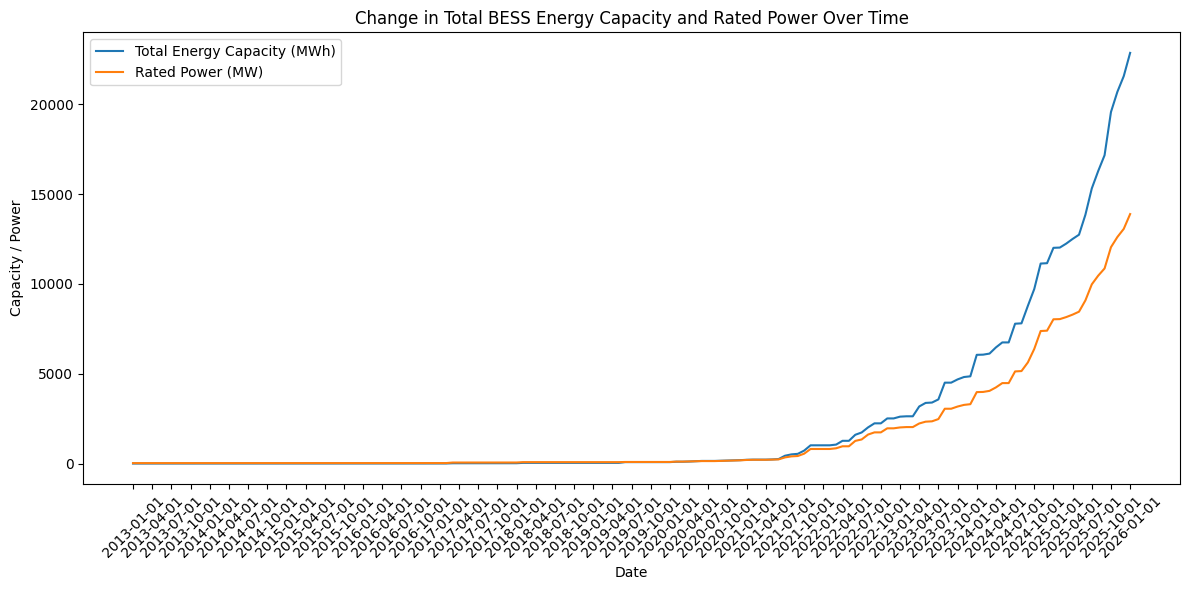

In [23]:
import matplotlib.pyplot as plt

# Check for likely column names
print(df.columns)

# Example: adjust these column names as needed based on the printout
df_grouped = (
    df.groupby("date")
    .agg({"total_energy_capacity_mwh": "sum", "total_rated_power_mw": "sum"})
    .reset_index()
)

plt.figure(figsize=(12, 6))
plt.plot(
    df_grouped["date"],
    df_grouped["total_energy_capacity_mwh"],
    label="Total Energy Capacity (MWh)",
)
plt.plot(
    df_grouped["date"], df_grouped["total_rated_power_mw"], label="Rated Power (MW)"
)
plt.xlabel("Date")
plt.ylabel("Capacity / Power")
plt.title("Change in Total BESS Energy Capacity and Rated Power Over Time")
plt.legend()

# Show only one date label per quarter
dates = pd.to_datetime(df_grouped["date"])
quarter_ticks = [
    i for i, d in enumerate(dates) if d.month in [1, 4, 7, 10] and d.day == 1
]
plt.xticks(quarter_ticks, [df_grouped["date"][i] for i in quarter_ticks], rotation=45)

plt.tight_layout()
plt.show()

In [36]:
client.get_ercot_generation_fuel_mix(
    params={"date_from": "2023-01-01", "date_to": "2023-12-31"}
)

Fetching pages: 0page [00:00, ?page/s]

TypeError: bool() undefined when iterable == total == None